### SatelliteBench

* [Dataset](https://physionet.org/content/multimodal-satellite-data/1.0.0/)

* [Paper](https://arxiv.org/abs/2401.11114)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels, split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings/satellitedata/'
COLUMN = 'embeddings'

In [3]:
os.listdir(PATH)

['text_embeddings.csv', 'Embeddings_dinov2_base.csv']

In [4]:
text_path, images_path = os.listdir(PATH)

## Get data

### Text

In [5]:
text = pd.read_csv(os.path.join(PATH, text_path))
text

,image_id,text,Labels,split,embeddings,Labels_3
0,73001_2016-06-12.jpg,An image from city Ibagué taken in date 2016-0...,1,train,"[-0.09650082141160965, 1.2055244445800781, 2.9...",2
1,76001_2017-06-11.jpg,An image from city Cali taken in date 2017-06-...,1,train,"[-0.4522910714149475, 0.30894309282302856, 2.4...",1
2,8001_2018-04-15.jpg,An image from city Barranquilla taken in date ...,0,train,"[-0.0652422159910202, 1.3169386386871338, 2.93...",0
3,23001_2016-05-08.jpg,An image from city Montería taken in date 2016...,0,train,"[0.1556963175535202, 1.530778408050537, 2.4552...",1
4,5001_2017-04-30.jpg,An image from city Medellín taken in date 2017...,0,train,"[-0.044512730091810226, 1.4423651695251465, 2....",0
...,...,...,...,...,...,...
1555,50001_2017-03-19.jpg,An image from city Villavicencio taken in date...,0,test,"[-0.13832411170005798, 1.8367681503295898, 2.9...",0
1556,23001_2017-03-26.jpg,An image from city Montería taken in date 2017...,0,test,"[0.23850595951080322, 1.6161019802093506, 2.43...",0
1557,8001_2017-01-22.jpg,An image from city Barranquilla taken in date ...,0,test,"[-0.033280204981565475, 1.276212453842163, 2.9...",0
1558,76001_2017-09-10.jpg,An image from city Cali taken in date 2017-09-...,0,test,"[-0.37734487652778625, 0.3405585289001465, 2.4...",0


### Images

In [6]:
images = pd.read_csv(os.path.join(PATH, images_path))
images.head()

,ImageName,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,54001_2017-09-03.jpg,0.418299,0.947702,0.930388,1.698969,1.807374,-4.289507,1.434896,-0.381494,-0.494811,...,0.121961,0.978187,0.832099,0.949627,0.148457,2.130906,-0.018057,0.265088,-0.705121,-0.993023
1,5360_2016-12-25.jpg,-1.733152,0.072954,1.217731,3.282928,-0.287547,-3.268999,2.195235,-0.195035,1.090694,...,1.402666,0.294792,-0.431750,0.177886,-0.160068,-1.048362,-0.341087,-1.085934,-3.382511,0.131394
2,54001_2016-05-29.jpg,-2.767494,-2.456418,-1.362022,0.398221,0.084387,-2.661927,-0.587058,-0.366591,2.110123,...,-2.133517,-1.048133,-2.228444,-0.124623,0.926207,0.679562,1.155562,-0.294559,-3.736522,1.592287
3,23001_2017-06-18.jpg,1.059556,-2.826679,3.481805,-1.756573,1.112543,0.456796,1.465225,-1.027905,0.381944,...,0.490742,0.716432,-0.887395,1.397451,1.245598,1.794311,-0.842432,-0.949204,0.723057,-1.643899
4,8001_2017-10-22.jpg,0.867121,-0.907118,0.126425,2.029071,0.294439,-3.256753,1.642754,-0.364946,0.308146,...,-0.105881,1.974369,-1.195430,0.320480,-0.870654,0.438181,-0.759199,-0.114644,-0.726150,-2.746522


### Merge and preprocess the datasets

In [7]:
df = preprocess_data(text, images, "image_id", "ImageName")
df.drop(columns='text', inplace=True)
df.Labels = df.Labels.astype(str)
df.to_csv(os.path.join(PATH, 'embeddings.csv'), index=False)
df.head()

,Labels,split,Labels_3,text_1,text_2,text_3,text_4,text_5,text_6,text_7,...,image_758,image_759,image_760,image_761,image_762,image_763,image_764,image_765,image_766,image_767
0,1,train,2,-0.096501,1.205524,2.905390,-2.219429,1.150509,0.569432,-0.356423,...,0.034481,2.774758,-2.069296,-2.671446,0.515329,-2.267930,0.718683,0.122811,-4.576390,1.210221
1,1,train,1,-0.452291,0.308943,2.466208,-1.508362,1.242943,0.745052,-0.132537,...,0.844251,0.817014,-0.025139,-0.881781,-1.026639,-3.901793,0.602378,-1.098464,-2.236027,-0.790404
2,0,train,0,-0.065242,1.316939,2.932482,-2.918486,0.728361,0.059235,0.183577,...,-0.725195,-1.517719,-0.476940,0.597161,-0.629077,-0.853710,-0.132599,1.200893,-2.902938,0.482014
3,0,train,1,0.155696,1.530778,2.455221,-2.938133,1.358293,0.756503,-0.738332,...,0.490742,0.716432,-0.887395,1.397451,1.245598,1.794311,-0.842432,-0.949204,0.723057,-1.643899
4,0,train,0,-0.044513,1.442365,2.950566,-2.586152,1.567985,0.305916,-0.125401,...,-0.916818,-1.870640,-2.094238,-0.733254,0.511989,-0.297835,0.168513,-0.451834,-3.857307,1.022027


## Data Perparation

In [8]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'Labels'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (936, 4867)
Test Shape: (312, 4867)


### Models

In [9]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 2.38 MB
The number of parameters of the model are: 623234


STAGE:2024-02-08 22:14:25 32159:32159 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/30 - Test Accuracy: 0.5609, macro-f1: 0.4266
Epoch 1/30 - Training Time: 0.19 seconds | Inference Time: 0.10 seconds
Epoch 2/30 - Test Accuracy: 0.5609, macro-f1: 0.4069
Epoch 2/30 - Training Time: 0.23 seconds | Inference Time: 0.10 seconds
Epoch 3/30 - Test Accuracy: 0.5737, macro-f1: 0.5238
Epoch 3/30 - Training Time: 0.27 seconds | Inference Time: 0.13 seconds
Epoch 4/30 - Test Accuracy: 0.5769, macro-f1: 0.5347
Epoch 4/30 - Training Time: 0.23 seconds | Inference Time: 0.11 seconds
Epoch 5/30 - Test Accuracy: 0.5737, macro-f1: 0.5445
Epoch 5/30 - Training Time: 0.24 seconds | Inference Time: 0.11 seconds
Epoch 6/30 - Test Accuracy: 0.5577, macro-f1: 0.5576
Epoch 6/30 - Training Time: 0.26 seconds | Inference Time: 0.11 seconds
Epoch 7/30 - Test Accuracy: 0.5160, macro-f1: 0.4162
Epoch 7/30 - Training Time: 0.25 seconds | Inference Time: 0.09 seconds
Epoch 8/30 - Test Accuracy: 0.5673, macro-f1: 0.5210
Epoch 8/30 - Training Time: 0.25 seconds | Inference Time: 0.10 seconds


STAGE:2024-02-08 22:14:36 32159:32159 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 22:14:36 32159:32159 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         4.81%     416.872ms        52.89%        4.585s      10.189ms    -521.97 Mb    -529.69 Mb           450  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        38.63%        3.348s        38.86%        3.369s       5.104ms     694.76 Mb     694.54 Mb           660  
                              Optimizer.step#AdamW.step         2.99%     259.255ms        22.38%        1.940s       4.311ms       4.75 Mb      -2.07

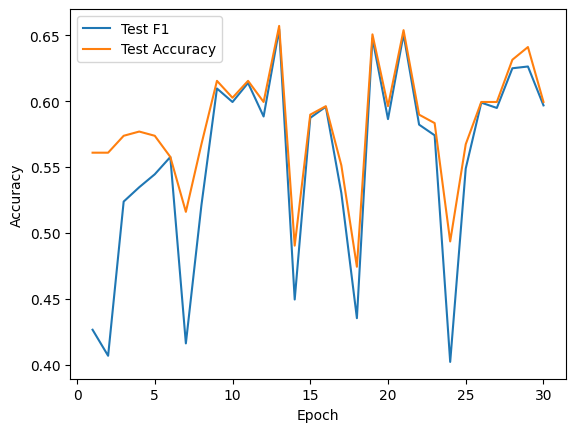

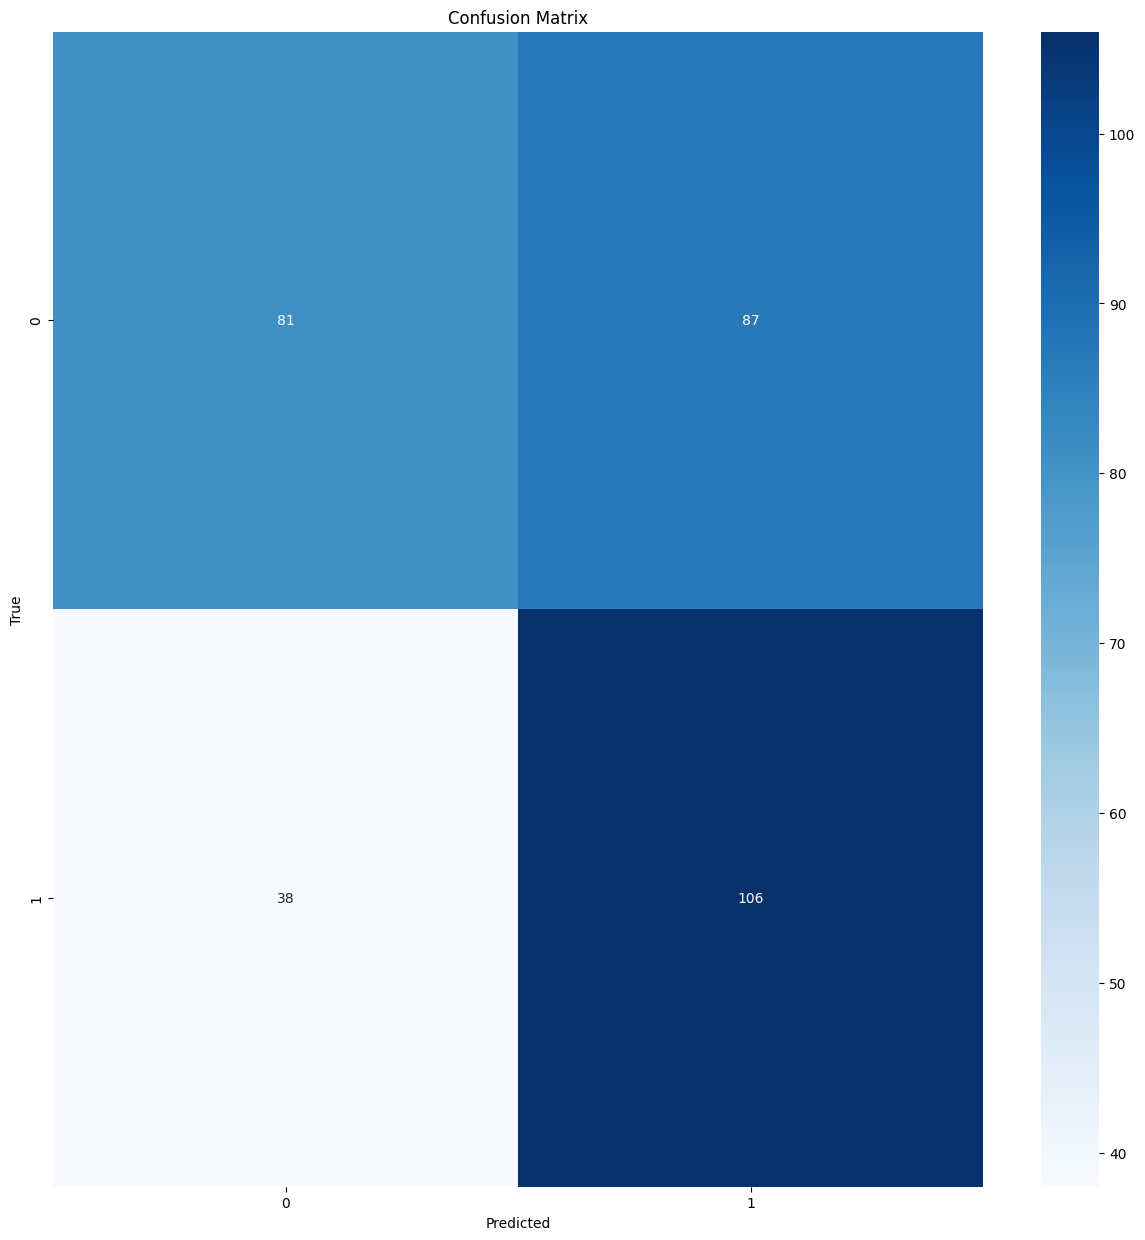

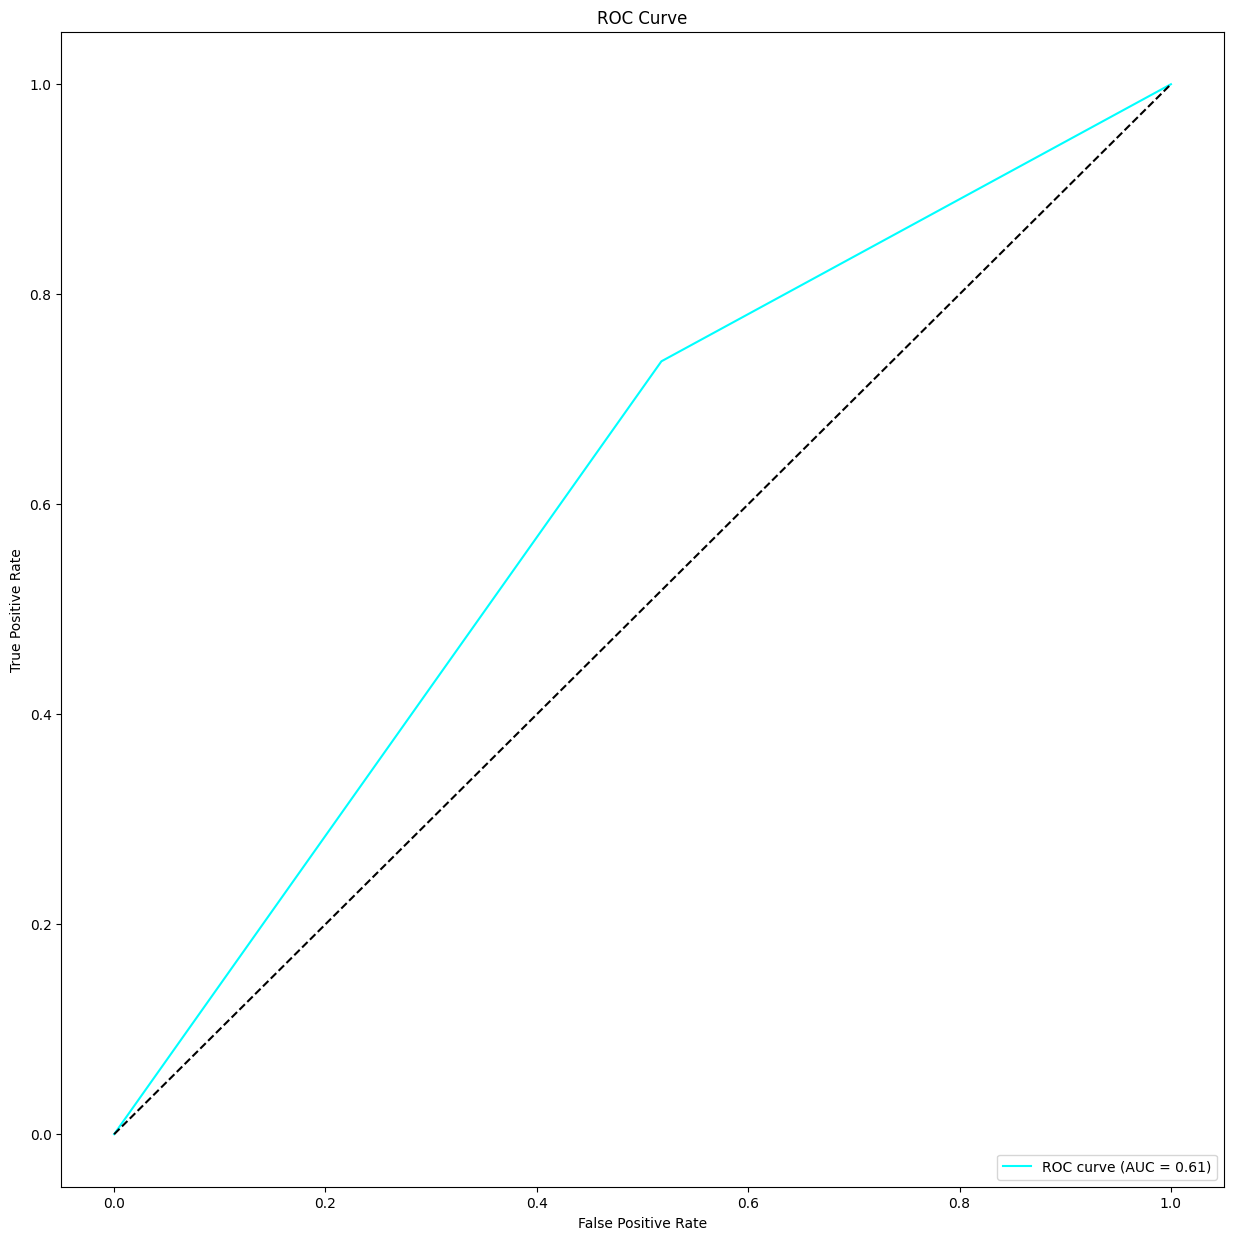

              precision    recall  f1-score   support

           0       0.68      0.48      0.56       168
           1       0.55      0.74      0.63       144

    accuracy                           0.60       312
   macro avg       0.61      0.61      0.60       312
weighted avg       0.62      0.60      0.59       312



In [10]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=30, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 1.19 MB
The number of parameters of the model are: 311938


STAGE:2024-02-08 22:14:57 32159:32159 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/30 - Test Accuracy: 0.5385, macro-f1: 0.3500
Epoch 1/30 - Training Time: 0.26 seconds | Inference Time: 0.14 seconds
Epoch 2/30 - Test Accuracy: 0.5513, macro-f1: 0.4255
Epoch 2/30 - Training Time: 0.28 seconds | Inference Time: 0.13 seconds
Epoch 3/30 - Test Accuracy: 0.5609, macro-f1: 0.5565
Epoch 3/30 - Training Time: 0.29 seconds | Inference Time: 0.13 seconds
Epoch 4/30 - Test Accuracy: 0.5577, macro-f1: 0.5495
Epoch 4/30 - Training Time: 0.26 seconds | Inference Time: 0.14 seconds
Epoch 5/30 - Test Accuracy: 0.5449, macro-f1: 0.5262
Epoch 5/30 - Training Time: 0.25 seconds | Inference Time: 0.13 seconds
Epoch 6/30 - Test Accuracy: 0.5865, macro-f1: 0.5865
Epoch 6/30 - Training Time: 0.29 seconds | Inference Time: 0.13 seconds
Epoch 7/30 - Test Accuracy: 0.5353, macro-f1: 0.5225
Epoch 7/30 - Training Time: 0.29 seconds | Inference Time: 0.13 seconds
Epoch 8/30 - Test Accuracy: 0.5897, macro-f1: 0.5771
Epoch 8/30 - Training Time: 0.27 seconds | Inference Time: 0.13 seconds


STAGE:2024-02-08 22:15:10 32159:32159 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 22:15:10 32159:32159 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         6.49%     574.979ms        51.99%        4.609s       7.681ms    -690.25 Mb    -694.64 Mb           600  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        47.71%        4.229s        47.93%        4.249s       6.438ms     694.76 Mb     694.54 Mb           660  
                              Optimizer.step#AdamW.step         3.68%     326.337ms        26.56%        2.354s       5.232ms       2.38 Mb      -1.04

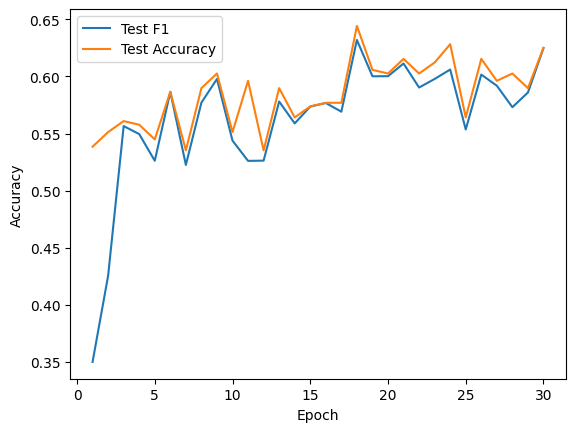

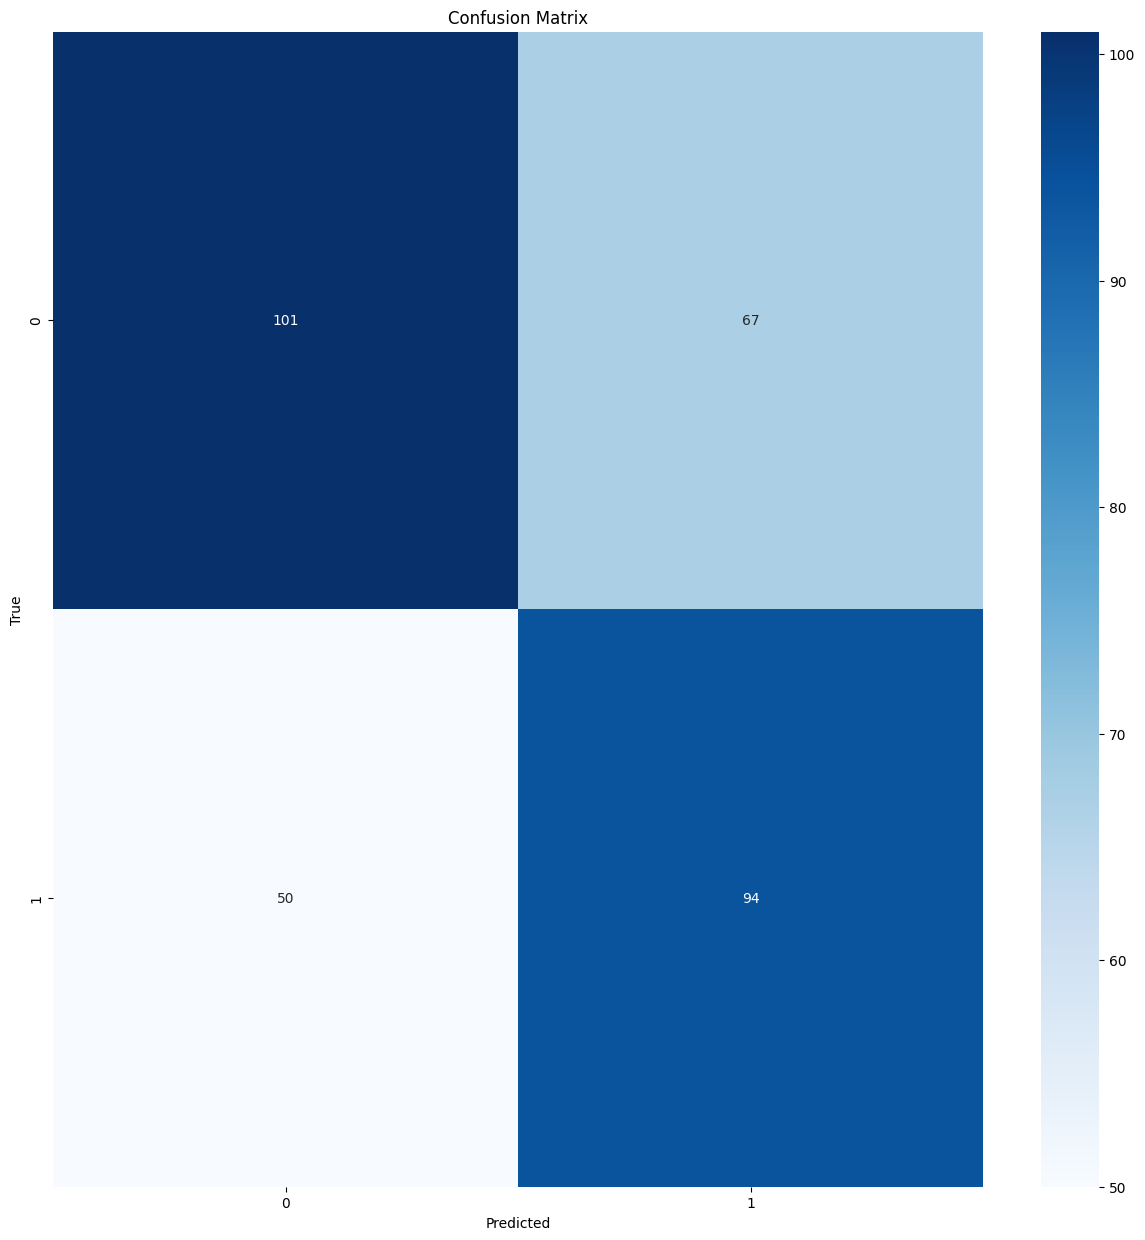

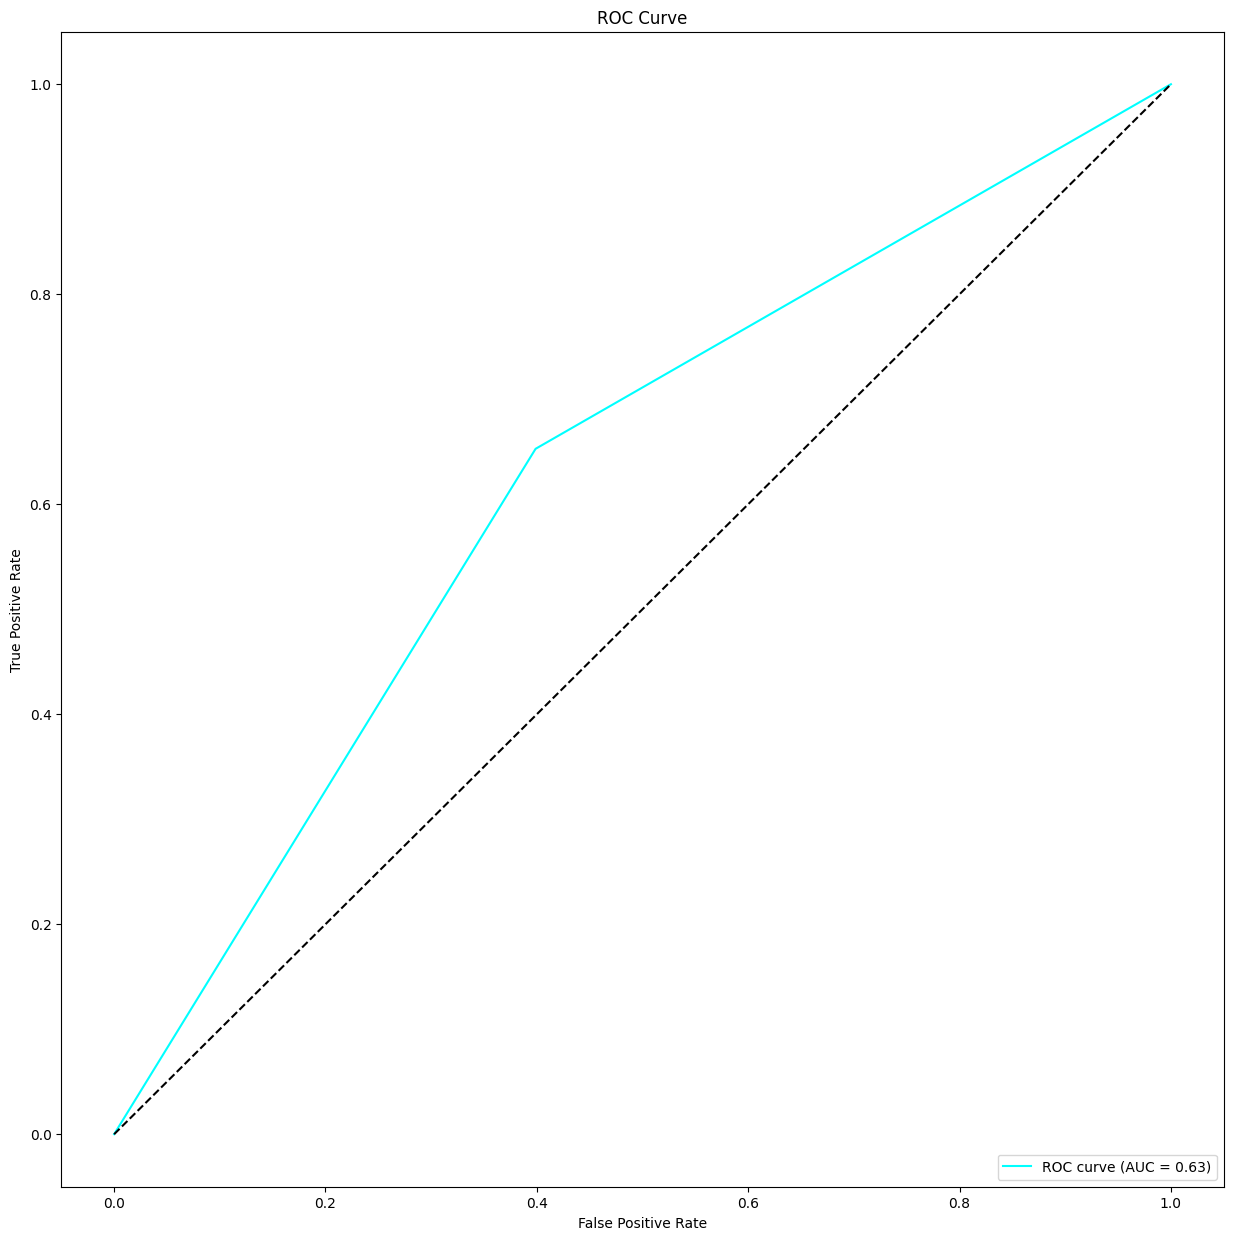

              precision    recall  f1-score   support

           0       0.67      0.60      0.63       168
           1       0.58      0.65      0.62       144

    accuracy                           0.62       312
   macro avg       0.63      0.63      0.62       312
weighted avg       0.63      0.62      0.63       312



In [11]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=30, multilabel=multilabel, report=True)